In [0]:
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab5/lab5_img.jpeg
!ls

lab5_img.jpeg  sample_data


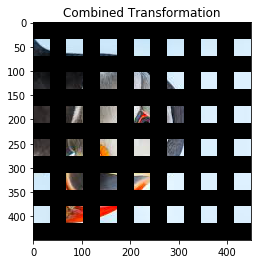

In [0]:
  # Import libraries
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io, img_as_ubyte

image = img_as_ubyte(io.imread('lab5_img.jpeg'))


#Rotation Transformation Matrix

#angle = np.radians(90)
#rotationMatrix = np.array([[np.cos(angle), -np.sin(angle), 0], [np.sin(angle), np.cos(angle), 0], [0, 0, 1]]) 
rotationMatrix = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])


#Scale Transformation Matrix 
scalingMatrix = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])
newMatrix = rotationMatrix.dot(scalingMatrix)

#Calculating dimension for newImage 
height = image.shape[0]
h=(height*2)-1
width = image.shape[1]
w=(width*2)-1

#Apply the combined transformations to the spatial domain of the image data
newImage = np.empty((h, w, 3), dtype=np.uint8)
for i in range(height):
  for j in range(width):
    data = image[i, j]
    points = np.array([i, j, 1])
    output_x, output_y, _ = newMatrix.dot(points)
    newImage[output_x, output_y] = data

plt.imshow((newImage).astype(np.uint8))
plt.title('Combined Transformation')
plt.show()


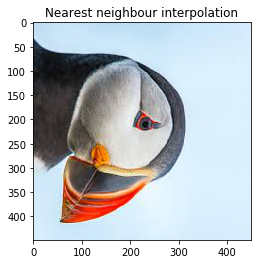

In [0]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io, img_as_ubyte
from skimage.transform import warp
from scipy.ndimage import affine_transform

image = img_as_ubyte(io.imread('lab5_img.jpeg'))


#Rotation Transformation Matrix
rotationMatrix = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])


#Scale Transformation Matrix 
scalingMatrix = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])
newMatrix = rotationMatrix.dot(scalingMatrix)

#Calculating dimension for newImage 
height = image.shape[0]
h=(height*2)-1
width = image.shape[1]
w=(width*2)-1

#Apply the combined transformations to the spatial domain of the image data
newImage = np.empty((h, w, 3), dtype=np.uint8)
for i in range(height):
  for j in range(width):
    data = image[i, j]
    points = np.array([i, j, 1])
    output_x, output_y, _ = newMatrix.dot(points)
    newImage[output_x, output_y] = data

#Getting the inverse of the transformation 
inverseMatrix = np.linalg.inv(newMatrix)

# 6) Nearest neighbour interpolation

#warped = warp(image, ProjectiveTransform(inverseMatrix), order = 0, mode = 'reflect')
warped = affine_transform(image, inverseMatrix, output_shape = newImage.shape, mode ='wrap')
plt.imshow(warped)
plt.title('Nearest neighbour interpolation')
plt.show()
